In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: TXN
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


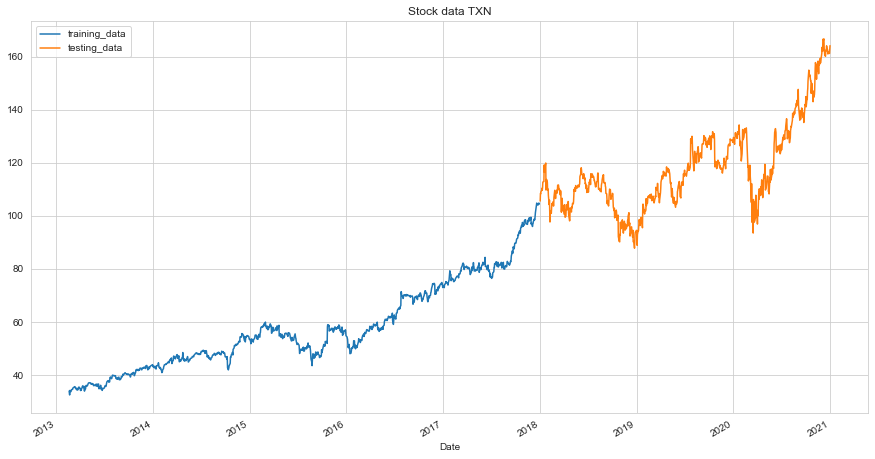

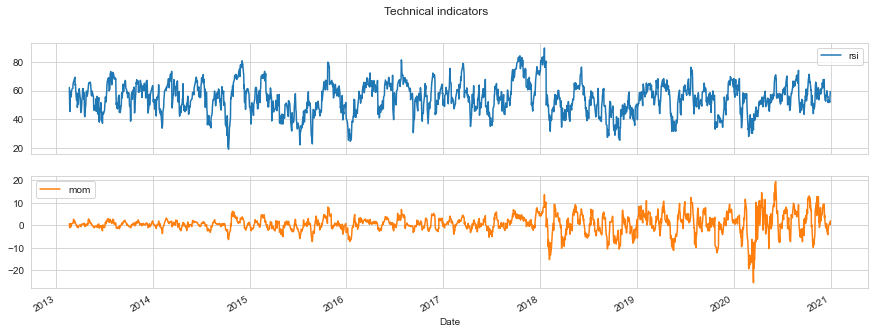

In [2]:
stock_name = 'txn'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1521.83, duration: 0:00:00.201049
episode: 2/2000, episode end value: 1530.04, duration: 0:00:00.177034
episode: 3/2000, episode end value: 1492.92, duration: 0:00:00.170019
episode: 4/2000, episode end value: 1651.65, duration: 0:00:00.203038
episode: 5/2000, episode end value: 1590.73, duration: 0:00:00.205922
episode: 6/2000, episode end value: 1575.18, duration: 0:00:00.204504
episode: 7/2000, episode end value: 1538.09, duration: 0:00:00.211674
episode: 8/2000, episode end value: 1598.17, duration: 0:00:00.212055
episode: 9/2000, episode end value: 1544.67, duration: 0:00:00.208059
episode: 10/2000, episode end value: 1684.33, duration: 0:00:00.207046
episode: 11/2000, episode end value: 1591.01, duration: 0:00:00.210059
episode: 12/2000, episode end value: 1602.93, duration: 0:00:00.207028
episode: 13/2000, episode end value: 1566.45, duration: 0:00:00.200470
episode: 14/2000, episode end value: 1564.79, duration: 0:00:00.206046
episode: 15/200

episode: 118/2000, episode end value: 1640.13, duration: 0:00:00.205045
episode: 119/2000, episode end value: 1578.26, duration: 0:00:00.213048
episode: 120/2000, episode end value: 1684.20, duration: 0:00:00.202045
episode: 121/2000, episode end value: 1587.65, duration: 0:00:00.204047
episode: 122/2000, episode end value: 1575.30, duration: 0:00:00.214049
episode: 123/2000, episode end value: 1591.66, duration: 0:00:00.207047
episode: 124/2000, episode end value: 1603.34, duration: 0:00:00.205046
episode: 125/2000, episode end value: 1594.31, duration: 0:00:00.212047
episode: 126/2000, episode end value: 1597.86, duration: 0:00:00.208046
episode: 127/2000, episode end value: 1586.96, duration: 0:00:00.206714
episode: 128/2000, episode end value: 1613.21, duration: 0:00:00.204481
episode: 129/2000, episode end value: 1596.46, duration: 0:00:00.204048
episode: 130/2000, episode end value: 1591.75, duration: 0:00:00.213658
episode: 131/2000, episode end value: 1593.46, duration: 0:00:00

episode: 232/2000, episode end value: 1553.42, duration: 0:00:00.206046
episode: 233/2000, episode end value: 1602.67, duration: 0:00:00.210047
episode: 234/2000, episode end value: 1584.73, duration: 0:00:00.184062
episode: 235/2000, episode end value: 1529.16, duration: 0:00:00.216027
episode: 236/2000, episode end value: 1536.21, duration: 0:00:00.194058
episode: 237/2000, episode end value: 1549.79, duration: 0:00:00.218033
episode: 238/2000, episode end value: 1552.98, duration: 0:00:00.220051
episode: 239/2000, episode end value: 1521.35, duration: 0:00:00.218048
episode: 240/2000, episode end value: 1530.12, duration: 0:00:00.228051
episode: 241/2000, episode end value: 1528.80, duration: 0:00:00.224059
episode: 242/2000, episode end value: 1530.57, duration: 0:00:00.230053
episode: 243/2000, episode end value: 1530.87, duration: 0:00:00.238053
episode: 244/2000, episode end value: 1528.02, duration: 0:00:00.230066
episode: 245/2000, episode end value: 1535.89, duration: 0:00:00

episode: 346/2000, episode end value: 1569.95, duration: 0:00:00.213060
episode: 347/2000, episode end value: 1675.01, duration: 0:00:00.182040
episode: 348/2000, episode end value: 1594.42, duration: 0:00:00.202048
episode: 349/2000, episode end value: 1567.88, duration: 0:00:00.199042
episode: 350/2000, episode end value: 1574.18, duration: 0:00:00.210040
episode: 351/2000, episode end value: 1526.60, duration: 0:00:00.218045
episode: 352/2000, episode end value: 1551.01, duration: 0:00:00.196049
episode: 353/2000, episode end value: 1539.22, duration: 0:00:00.210049
episode: 354/2000, episode end value: 1547.37, duration: 0:00:00.189034
episode: 355/2000, episode end value: 1539.44, duration: 0:00:00.228038
episode: 356/2000, episode end value: 1616.64, duration: 0:00:00.203045
episode: 357/2000, episode end value: 1530.82, duration: 0:00:00.196032
episode: 358/2000, episode end value: 1548.59, duration: 0:00:00.186307
episode: 359/2000, episode end value: 1551.45, duration: 0:00:00

episode: 461/2000, episode end value: 1596.94, duration: 0:00:00.200601
episode: 462/2000, episode end value: 1514.14, duration: 0:00:00.205404
episode: 463/2000, episode end value: 1575.32, duration: 0:00:00.188052
episode: 464/2000, episode end value: 1533.38, duration: 0:00:00.209032
episode: 465/2000, episode end value: 1623.95, duration: 0:00:00.197050
episode: 466/2000, episode end value: 1541.51, duration: 0:00:00.179040
episode: 467/2000, episode end value: 1535.62, duration: 0:00:00.203030
episode: 468/2000, episode end value: 1576.80, duration: 0:00:00.180040
episode: 469/2000, episode end value: 1521.61, duration: 0:00:00.210062
episode: 470/2000, episode end value: 1566.08, duration: 0:00:00.183053
episode: 471/2000, episode end value: 1524.05, duration: 0:00:00.189047
episode: 472/2000, episode end value: 1563.07, duration: 0:00:00.215148
episode: 473/2000, episode end value: 1715.69, duration: 0:00:00.189042
episode: 474/2000, episode end value: 1559.70, duration: 0:00:00

episode: 576/2000, episode end value: 1591.09, duration: 0:00:00.197520
episode: 577/2000, episode end value: 1578.51, duration: 0:00:00.200046
episode: 578/2000, episode end value: 1563.12, duration: 0:00:00.202056
episode: 579/2000, episode end value: 1585.05, duration: 0:00:00.214039
episode: 580/2000, episode end value: 1537.16, duration: 0:00:00.211053
episode: 581/2000, episode end value: 1538.55, duration: 0:00:00.191042
episode: 582/2000, episode end value: 1563.71, duration: 0:00:00.234052
episode: 583/2000, episode end value: 1564.94, duration: 0:00:00.232052
episode: 584/2000, episode end value: 1527.05, duration: 0:00:00.213859
episode: 585/2000, episode end value: 1706.79, duration: 0:00:00.186028
episode: 586/2000, episode end value: 1674.98, duration: 0:00:00.169028
episode: 587/2000, episode end value: 1570.49, duration: 0:00:00.191058
episode: 588/2000, episode end value: 1534.08, duration: 0:00:00.217035
episode: 589/2000, episode end value: 1524.61, duration: 0:00:00

episode: 690/2000, episode end value: 1566.18, duration: 0:00:00.204050
episode: 691/2000, episode end value: 1634.04, duration: 0:00:00.194044
episode: 692/2000, episode end value: 1573.68, duration: 0:00:00.212588
episode: 693/2000, episode end value: 1610.00, duration: 0:00:00.202045
episode: 694/2000, episode end value: 1592.69, duration: 0:00:00.189083
episode: 695/2000, episode end value: 1569.78, duration: 0:00:00.200070
episode: 696/2000, episode end value: 1584.44, duration: 0:00:00.215096
episode: 697/2000, episode end value: 1559.12, duration: 0:00:00.219867
episode: 698/2000, episode end value: 1569.67, duration: 0:00:00.230105
episode: 699/2000, episode end value: 1570.49, duration: 0:00:00.210106
episode: 700/2000, episode end value: 1651.03, duration: 0:00:00.194392
episode: 701/2000, episode end value: 1589.00, duration: 0:00:00.170037
episode: 702/2000, episode end value: 1571.37, duration: 0:00:00.213031
episode: 703/2000, episode end value: 1617.02, duration: 0:00:00

episode: 804/2000, episode end value: 1622.48, duration: 0:00:00.212049
episode: 805/2000, episode end value: 1587.11, duration: 0:00:00.210048
episode: 806/2000, episode end value: 1691.42, duration: 0:00:00.207338
episode: 807/2000, episode end value: 1620.11, duration: 0:00:00.200056
episode: 808/2000, episode end value: 1609.75, duration: 0:00:00.206065
episode: 809/2000, episode end value: 1625.70, duration: 0:00:00.200931
episode: 810/2000, episode end value: 1625.80, duration: 0:00:00.203066
episode: 811/2000, episode end value: 1625.47, duration: 0:00:00.207952
episode: 812/2000, episode end value: 1588.66, duration: 0:00:00.202896
episode: 813/2000, episode end value: 1691.68, duration: 0:00:00.216049
episode: 814/2000, episode end value: 1584.96, duration: 0:00:00.195056
episode: 815/2000, episode end value: 1602.59, duration: 0:00:00.205782
episode: 816/2000, episode end value: 1550.61, duration: 0:00:00.187177
episode: 817/2000, episode end value: 1563.93, duration: 0:00:00

episode: 918/2000, episode end value: 1563.65, duration: 0:00:00.213035
episode: 919/2000, episode end value: 1845.01, duration: 0:00:00.171051
episode: 920/2000, episode end value: 1572.70, duration: 0:00:00.182041
episode: 921/2000, episode end value: 1570.00, duration: 0:00:00.196037
episode: 922/2000, episode end value: 1563.92, duration: 0:00:00.227458
episode: 923/2000, episode end value: 1542.91, duration: 0:00:00.220042
episode: 924/2000, episode end value: 1563.32, duration: 0:00:00.212061
episode: 925/2000, episode end value: 1591.07, duration: 0:00:00.218043
episode: 926/2000, episode end value: 1611.30, duration: 0:00:00.201045
episode: 927/2000, episode end value: 1565.01, duration: 0:00:00.179047
episode: 928/2000, episode end value: 1542.92, duration: 0:00:00.215064
episode: 929/2000, episode end value: 1528.66, duration: 0:00:00.191055
episode: 930/2000, episode end value: 1561.21, duration: 0:00:00.229051
episode: 931/2000, episode end value: 1564.06, duration: 0:00:00

episode: 1032/2000, episode end value: 1551.76, duration: 0:00:00.191069
episode: 1033/2000, episode end value: 1555.83, duration: 0:00:00.231062
episode: 1034/2000, episode end value: 1560.47, duration: 0:00:00.226125
episode: 1035/2000, episode end value: 1547.31, duration: 0:00:00.208737
episode: 1036/2000, episode end value: 1548.85, duration: 0:00:00.207045
episode: 1037/2000, episode end value: 1545.59, duration: 0:00:00.210514
episode: 1038/2000, episode end value: 1553.96, duration: 0:00:00.211025
episode: 1039/2000, episode end value: 1529.84, duration: 0:00:00.221036
episode: 1040/2000, episode end value: 1615.90, duration: 0:00:00.212061
episode: 1041/2000, episode end value: 1652.95, duration: 0:00:00.191028
episode: 1042/2000, episode end value: 1599.22, duration: 0:00:00.170052
episode: 1043/2000, episode end value: 1558.28, duration: 0:00:00.177031
episode: 1044/2000, episode end value: 1544.79, duration: 0:00:00.197037
episode: 1045/2000, episode end value: 1542.70, dur

episode: 1145/2000, episode end value: 1549.34, duration: 0:00:00.220055
episode: 1146/2000, episode end value: 1561.36, duration: 0:00:00.221049
episode: 1147/2000, episode end value: 1526.82, duration: 0:00:00.214041
episode: 1148/2000, episode end value: 1638.62, duration: 0:00:00.194050
episode: 1149/2000, episode end value: 1626.04, duration: 0:00:00.168039
episode: 1150/2000, episode end value: 1671.13, duration: 0:00:00.171030
episode: 1151/2000, episode end value: 1600.79, duration: 0:00:00.171045
episode: 1152/2000, episode end value: 1600.84, duration: 0:00:00.207046
episode: 1153/2000, episode end value: 1540.16, duration: 0:00:00.207046
episode: 1154/2000, episode end value: 1528.15, duration: 0:00:00.221587
episode: 1155/2000, episode end value: 1522.22, duration: 0:00:00.191070
episode: 1156/2000, episode end value: 1522.30, duration: 0:00:00.192256
episode: 1157/2000, episode end value: 1656.39, duration: 0:00:00.175810
episode: 1158/2000, episode end value: 1607.02, dur

episode: 1258/2000, episode end value: 1553.04, duration: 0:00:00.215047
episode: 1259/2000, episode end value: 1522.61, duration: 0:00:00.220968
episode: 1260/2000, episode end value: 1531.08, duration: 0:00:00.236012
episode: 1261/2000, episode end value: 1556.89, duration: 0:00:00.233970
episode: 1262/2000, episode end value: 1565.90, duration: 0:00:00.228039
episode: 1263/2000, episode end value: 1559.43, duration: 0:00:00.233985
episode: 1264/2000, episode end value: 1566.27, duration: 0:00:00.229038
episode: 1265/2000, episode end value: 1563.97, duration: 0:00:00.226036
episode: 1266/2000, episode end value: 1625.85, duration: 0:00:00.214060
episode: 1267/2000, episode end value: 1565.76, duration: 0:00:00.212053
episode: 1268/2000, episode end value: 1629.56, duration: 0:00:00.210047
episode: 1269/2000, episode end value: 1579.90, duration: 0:00:00.210047
episode: 1270/2000, episode end value: 1576.58, duration: 0:00:00.211048
episode: 1271/2000, episode end value: 1623.75, dur

episode: 1372/2000, episode end value: 1595.63, duration: 0:00:00.206553
episode: 1373/2000, episode end value: 1569.42, duration: 0:00:00.209048
episode: 1374/2000, episode end value: 1590.85, duration: 0:00:00.203044
episode: 1375/2000, episode end value: 1558.41, duration: 0:00:00.203045
episode: 1376/2000, episode end value: 1620.84, duration: 0:00:00.174031
episode: 1377/2000, episode end value: 1599.94, duration: 0:00:00.175039
episode: 1378/2000, episode end value: 1555.84, duration: 0:00:00.184040
episode: 1379/2000, episode end value: 1558.64, duration: 0:00:00.184046
episode: 1380/2000, episode end value: 1655.97, duration: 0:00:00.195049
episode: 1381/2000, episode end value: 1624.86, duration: 0:00:00.177040
episode: 1382/2000, episode end value: 1581.58, duration: 0:00:00.177212
episode: 1383/2000, episode end value: 1549.24, duration: 0:00:00.188047
episode: 1384/2000, episode end value: 1596.55, duration: 0:00:00.212035
episode: 1385/2000, episode end value: 1566.38, dur

episode: 1486/2000, episode end value: 1573.32, duration: 0:00:00.211032
episode: 1487/2000, episode end value: 1621.23, duration: 0:00:00.206052
episode: 1488/2000, episode end value: 1627.97, duration: 0:00:00.175037
episode: 1489/2000, episode end value: 1545.28, duration: 0:00:00.178053
episode: 1490/2000, episode end value: 1517.29, duration: 0:00:00.208309
episode: 1491/2000, episode end value: 1558.21, duration: 0:00:00.228391
episode: 1492/2000, episode end value: 1526.70, duration: 0:00:00.233867
episode: 1493/2000, episode end value: 1527.57, duration: 0:00:00.232051
episode: 1494/2000, episode end value: 1534.87, duration: 0:00:00.219175
episode: 1495/2000, episode end value: 1610.46, duration: 0:00:00.194942
episode: 1496/2000, episode end value: 1547.31, duration: 0:00:00.202079
episode: 1497/2000, episode end value: 1562.33, duration: 0:00:00.224986
episode: 1498/2000, episode end value: 1533.68, duration: 0:00:00.218023
episode: 1499/2000, episode end value: 1547.84, dur

episode: 1599/2000, episode end value: 1566.32, duration: 0:00:00.233066
episode: 1600/2000, episode end value: 1586.24, duration: 0:00:00.215048
episode: 1601/2000, episode end value: 1772.42, duration: 0:00:00.169037
episode: 1602/2000, episode end value: 1628.21, duration: 0:00:00.197045
episode: 1603/2000, episode end value: 1782.23, duration: 0:00:00.202025
episode: 1604/2000, episode end value: 1776.29, duration: 0:00:00.181060
episode: 1605/2000, episode end value: 1568.76, duration: 0:00:00.190043
episode: 1606/2000, episode end value: 1646.20, duration: 0:00:00.184638
episode: 1607/2000, episode end value: 1596.76, duration: 0:00:00.202062
episode: 1608/2000, episode end value: 1556.30, duration: 0:00:00.205143
episode: 1609/2000, episode end value: 1525.49, duration: 0:00:00.218585
episode: 1610/2000, episode end value: 1578.82, duration: 0:00:00.207456
episode: 1611/2000, episode end value: 1551.01, duration: 0:00:00.225493
episode: 1612/2000, episode end value: 1560.24, dur

episode: 1712/2000, episode end value: 1582.90, duration: 0:00:00.206119
episode: 1713/2000, episode end value: 1577.47, duration: 0:00:00.210109
episode: 1714/2000, episode end value: 1571.28, duration: 0:00:00.197534
episode: 1715/2000, episode end value: 1539.81, duration: 0:00:00.180027
episode: 1716/2000, episode end value: 1554.62, duration: 0:00:00.227063
episode: 1717/2000, episode end value: 1556.38, duration: 0:00:00.225636
episode: 1718/2000, episode end value: 1546.96, duration: 0:00:00.233014
episode: 1719/2000, episode end value: 1533.68, duration: 0:00:00.222127
episode: 1720/2000, episode end value: 1521.91, duration: 0:00:00.200045
episode: 1721/2000, episode end value: 1564.31, duration: 0:00:00.183041
episode: 1722/2000, episode end value: 1579.24, duration: 0:00:00.190938
episode: 1723/2000, episode end value: 1580.83, duration: 0:00:00.209034
episode: 1724/2000, episode end value: 1629.96, duration: 0:00:00.181037
episode: 1725/2000, episode end value: 1574.11, dur

episode: 1825/2000, episode end value: 1545.67, duration: 0:00:00.228072
episode: 1826/2000, episode end value: 1566.65, duration: 0:00:00.234046
episode: 1827/2000, episode end value: 1564.80, duration: 0:00:00.227058
episode: 1828/2000, episode end value: 1564.60, duration: 0:00:00.229051
episode: 1829/2000, episode end value: 1564.22, duration: 0:00:00.234053
episode: 1830/2000, episode end value: 1527.81, duration: 0:00:00.221329
episode: 1831/2000, episode end value: 1550.75, duration: 0:00:00.191043
episode: 1832/2000, episode end value: 1557.02, duration: 0:00:00.195044
episode: 1833/2000, episode end value: 1537.64, duration: 0:00:00.224469
episode: 1834/2000, episode end value: 1539.54, duration: 0:00:00.233292
episode: 1835/2000, episode end value: 1566.25, duration: 0:00:00.230125
episode: 1836/2000, episode end value: 1565.90, duration: 0:00:00.229360
episode: 1837/2000, episode end value: 1559.24, duration: 0:00:00.224044
episode: 1838/2000, episode end value: 1564.53, dur

episode: 1939/2000, episode end value: 1599.78, duration: 0:00:00.208021
episode: 1940/2000, episode end value: 1582.39, duration: 0:00:00.204094
episode: 1941/2000, episode end value: 1622.51, duration: 0:00:00.206046
episode: 1942/2000, episode end value: 1551.32, duration: 0:00:00.206038
episode: 1943/2000, episode end value: 1623.64, duration: 0:00:00.193050
episode: 1944/2000, episode end value: 1691.53, duration: 0:00:00.207058
episode: 1945/2000, episode end value: 1588.97, duration: 0:00:00.199044
episode: 1946/2000, episode end value: 1614.91, duration: 0:00:00.201028
episode: 1947/2000, episode end value: 1594.63, duration: 0:00:00.193059
episode: 1948/2000, episode end value: 1631.13, duration: 0:00:00.210041
episode: 1949/2000, episode end value: 1520.94, duration: 0:00:00.208053
episode: 1950/2000, episode end value: 1551.23, duration: 0:00:00.211040
episode: 1951/2000, episode end value: 1527.14, duration: 0:00:00.229816
episode: 1952/2000, episode end value: 1552.71, dur

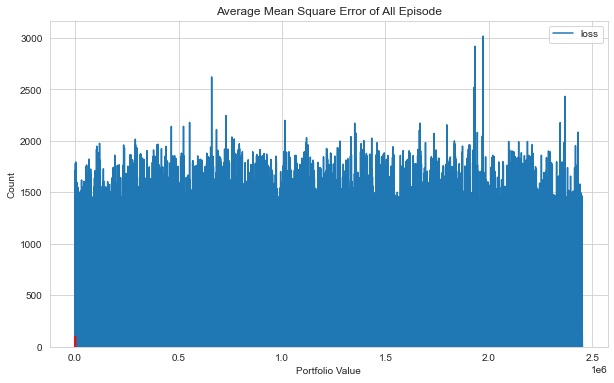

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

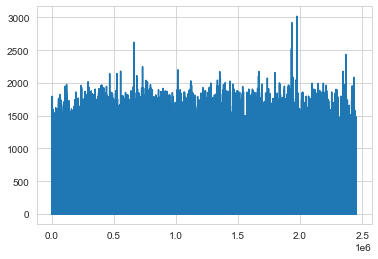

In [5]:
plt.plot(agent.model.losses)

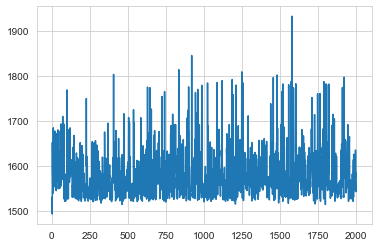

In [6]:
plt.plot(portfolio_value)

episode end value: 1303.19, duration: 0:00:00.050011
Sell: 0 times, Buy: 1 times


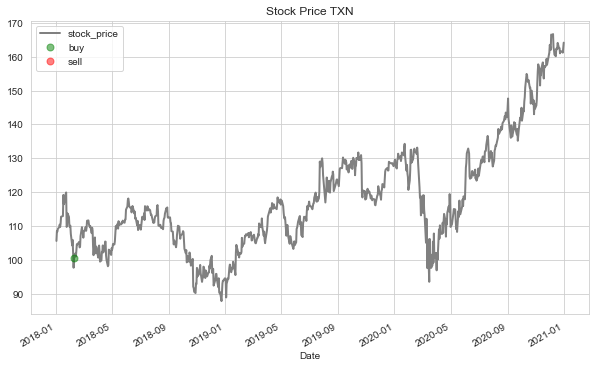

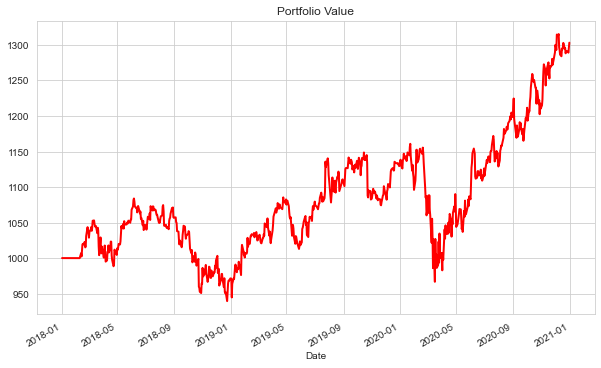

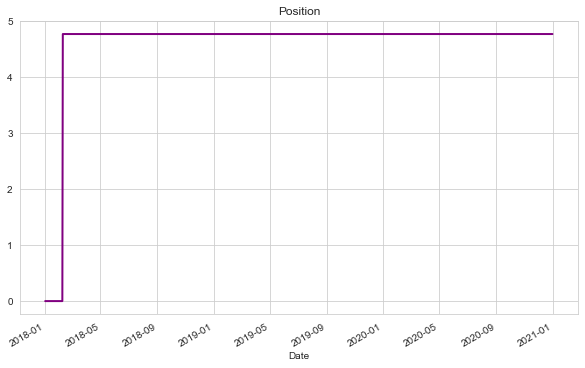

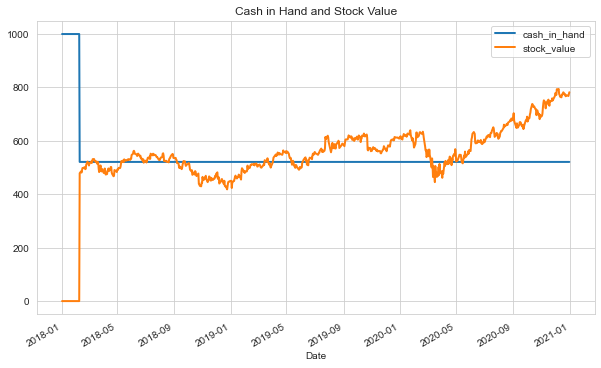

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: TXN
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 9.23 %
Volatility: 0.1674
shape ratio: 0.4856
Maximun drawdown: -16.73 %
Calmar ratio: 0.5517
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 15.85 %
Volatility (benchmark): 0.3431
shape ratio: 0.4299
Maximun drawdown: -30.35 %
Calmar ratio (benchmark): 0.5221


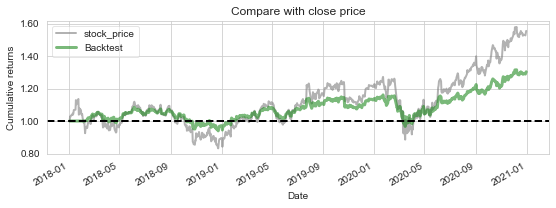

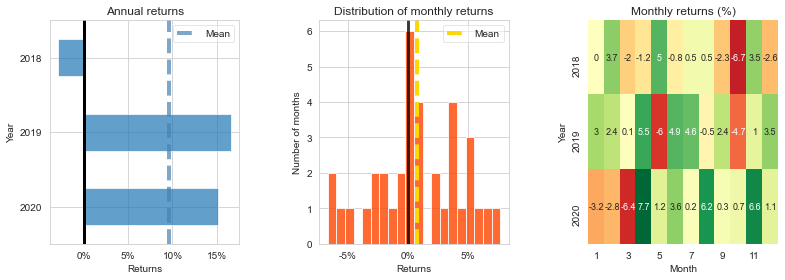

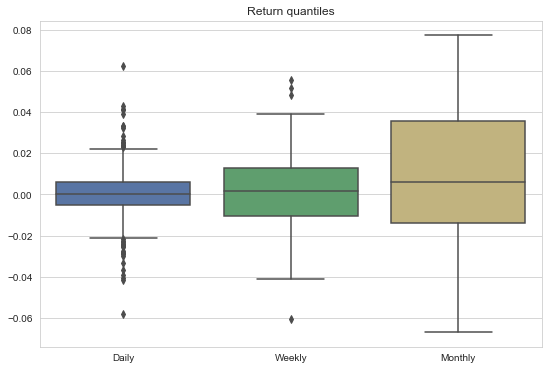

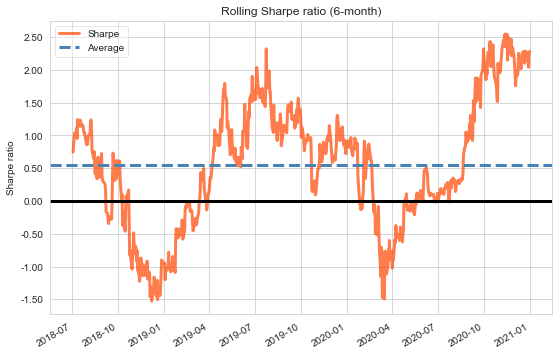

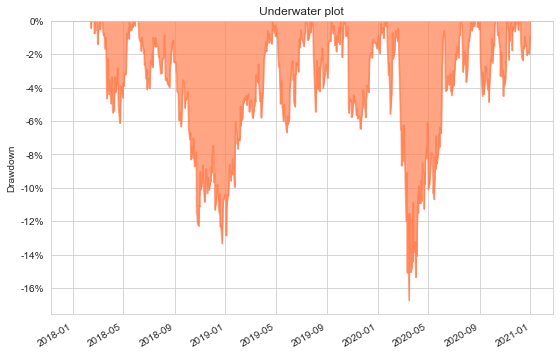

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')